In [3]:
pip install pandas_ml

     |████████████████████████████████| 100 kB 5.2 MB/s 


In [2]:
#--------------------------------------------------------------
# Include Libraries
#--------------------------------------------------------------

import pandas as pd

import sklearn

import itertools
import numpy as np

In [6]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, copy=False, strategy="mean", )

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

from matplotlib import pyplot as plt
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.model_selection import train_test_split

In [9]:
#--------------------------------------------------------------
# Importing dataset using pandas dataframe
#--------------------------------------------------------------
df = pd.read_csv("fake_or_real_news.csv")

In [10]:
# Inspect shape of `df` 
df.shape

(6335, 4)

In [11]:
# Print first lines of `df` 
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [12]:
# Set index 
df = df.set_index("Unnamed: 0")


In [13]:
# Print first lines of `df` 
df.head()

,title,text,label
Unnamed: 0,,,
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [14]:
#--------------------------------------------------------------
# Separate the labels and set up training and test datasets
#--------------------------------------------------------------
y = df.label 

In [15]:
# Drop the `label` column
df.drop("label", axis=1)      #where numbering of news article is done that column is dropped in dataset


,title,text
Unnamed: 0,,
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello..."
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T..."
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...
...,...,...
4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...
8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...


In [16]:
# Make training and test sets 
X_train, X_test, y_train, y_test = train_test_split(df['text'], y, test_size=0.33, random_state=53)


In [17]:
#--------------------------------------------------------------
# Building the Count and Tfidf Vectors
#--------------------------------------------------------------

# Initialize the `count_vectorizer` 
count_vectorizer = CountVectorizer(stop_words='english')


In [18]:
# Fit and transform the training data 
count_train = count_vectorizer.fit_transform(X_train)                  # Learn the vocabulary dictionary and return term-document matrix.


In [19]:
# Transform the test set 
count_test = count_vectorizer.transform(X_test)


In [20]:
# Initialize the `tfidf_vectorizer` 
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)    # This removes words which appear in more than 70% of the articles


In [21]:
# Fit and transform the training data 
tfidf_train = tfidf_vectorizer.fit_transform(X_train) 

In [22]:
# Transform the test set 
tfidf_test = tfidf_vectorizer.transform(X_test)

In [26]:
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())


In [27]:
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())


In [28]:
difference = set(count_df.columns) - set(tfidf_df.columns)
print(difference)


set()


In [29]:
# Check whether the DataFrames are equal
print(count_df.equals(tfidf_df))


False


In [33]:
#--------------------------------------------------------------
# Function to plot the confusion matrix 
#--------------------------------------------------------------

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [34]:
#--------------------------------------------------------------
# Naive Bayes classifier for Multinomial model 
#--------------------------------------------------------------

clf = MultinomialNB() 

clf.fit(tfidf_train, y_train)                       # Fit Naive Bayes classifier according to X, y


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

accuracy:   0.857
Confusion matrix, without normalization
[[ 739  269]
 [  31 1052]]


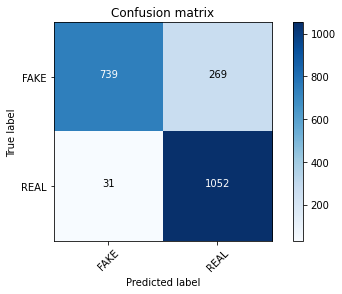

In [35]:
pred = clf.predict(tfidf_test)                     # Perform classification on an array of test vectors X.
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])
print(cm)

In [36]:
clf = MultinomialNB()

In [37]:
clf.fit(count_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

accuracy:   0.893
Confusion matrix, without normalization
[[ 865  143]
 [  80 1003]]


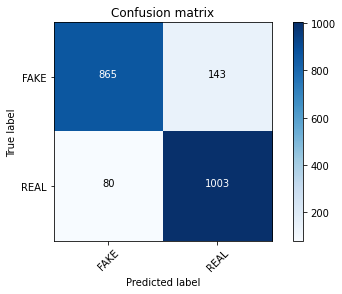

In [38]:
pred = clf.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])
print(cm)
#line158